# Notebook 4 — Entender los datos antes de usar IA

### EDA con datasets reales (Titanic y Housing)

Cuando trabajamos en proyectos de Inteligencia Artificial, uno de los errores más comunes es empezar directamente a entrenar modelos.
En la práctica profesional, **eso casi nunca se hace**.

Antes de usar cualquier algoritmo, lo primero es pararse a mirar los datos:
qué columnas hay, si faltan valores, si existen errores o valores extremos y si las variables tienen sentido para el problema que queremos resolver.

A este proceso se le llama **EDA (Exploratory Data Analysis)** y es justo lo que vamos a trabajar en este cuaderno.

---

Vamos a empezar con un dataset real y muy conocido: el del **Titanic**.
Lo usaremos como ejemplo guiado, igual que hacíamos con datasets de ejemplo en Python, y más adelante aplicarás lo mismo tú solo con otro dataset distinto.


---

### Empezamos preparando el entorno

Cuando trabajábamos en Python solíamos importar varias librerías: `pandas`, `seaborn`, `matplotlib`…
En R, todo eso lo tenemos agrupado en un único paquete llamado `tidyverse`.

In [1]:
library(tidyverse)


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


### Cargar los datos

En Python cargábamos los datos con `pd.read_csv()`.
En R hacemos exactamente lo mismo, solo que la función se llama `read_csv()` y viene incluida en tidyverse.


In [2]:
titanic <- read_csv(
  "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
)

Rows: 891 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): Name, Sex, Ticket, Cabin, Embarked
dbl (7): PassengerId, Survived, Pclass, Age, SibSp, Parch, Fare

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


A partir de aquí ya tenemos el dataset cargado y podemos empezar a explorarlo.


---

### Primer vistazo al dataset

En Python, lo primero que solíamos hacer tras cargar un dataset era ejecutar:

```python
df.info()
```

Eso nos servía para entender qué columnas había, qué tipo de datos tenían y si existían valores nulos.

En R usamos una función distinta, pero con el **mismo objetivo**: `glimpse()`.

In [3]:
glimpse(titanic)


Rows: 891
Columns: 12
$ PassengerId <dbl> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17,…
$ Survived    <dbl> 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1…
$ Pclass      <dbl> 3, 1, 3, 1, 3, 3, 1, 3, 3, 2, 3, 1, 3, 3, 3, 2, 3, 2, 3, 3…
$ Name        <chr> "Braund, Mr. Owen Harris", "Cumings, Mrs. John Bradley (Fl…
$ Sex         <chr> "male", "female", "female", "female", "male", "male", "mal…
$ Age         <dbl> 22, 38, 26, 35, 35, NA, 54, 2, 27, 14, 4, 58, 20, 39, 14, …
$ SibSp       <dbl> 1, 1, 0, 1, 0, 0, 0, 3, 0, 1, 1, 0, 0, 1, 0, 0, 4, 0, 1, 0…
$ Parch       <dbl> 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 0, 0, 5, 0, 0, 1, 0, 0, 0…
$ Ticket      <chr> "A/5 21171", "PC 17599", "STON/O2. 3101282", "113803", "37…
$ Fare        <dbl> 7.2500, 71.2833, 7.9250, 53.1000, 8.0500, 8.4583, 51.8625,…
$ Cabin       <chr> NA, "C85", NA, "C123", NA, NA, "E46", NA, NA, NA, "G6", "C…
$ Embarked    <chr> "S", "C", "S", "S", "S", "Q", "S", "S", "S", "C", "S", "S"…



La diferencia principal es que `glimpse()` es un poco más visual: además de mostrar los tipos de datos, enseña algunos valores de ejemplo.
Conceptualmente, **info() y glimpse() hacen lo mismo**.

Aquí ya deberías detectar varias cosas importantes:

* Hay variables numéricas como `Age` o `Fare`
* Hay variables categóricas como `Sex` o `Embarked`
* La variable `Survived` parece la que queremos predecir
* Algunas columnas tienen valores que faltan

---

### Valores que faltan (NA)

En Python, cuando queríamos saber cuántos valores nulos había, usábamos algo como:

```python
df.isna().sum()
```

En R el proceso es muy parecido: primero detectamos los NA y luego los contamos por columna.

In [4]:
colSums(is.na(titanic))


PassengerId    Survived      Pclass        Name         Sex         Age 
          0           0           0           0           0         177 
      SibSp       Parch      Ticket        Fare       Cabin    Embarked 
          0           0           0           0         687           2

Este paso es **clave en IA**.
Los modelos no saben qué hacer con valores vacíos, así que más adelante tendremos que decidir si:

* los eliminamos
* los rellenamos
* o descartamos la variable completa

Por ahora solo los detectamos.

---

### Entender una variable: distribución de edades

Antes de usar una variable en un modelo, conviene entender cómo se distribuye.

En Python solíamos usar histogramas con seaborn.
En R hacemos lo mismo usando `ggplot` y `geom_histogram()`.

Warning message:
“Removed 177 rows containing non-finite outside the scale range (`stat_bin()`).”


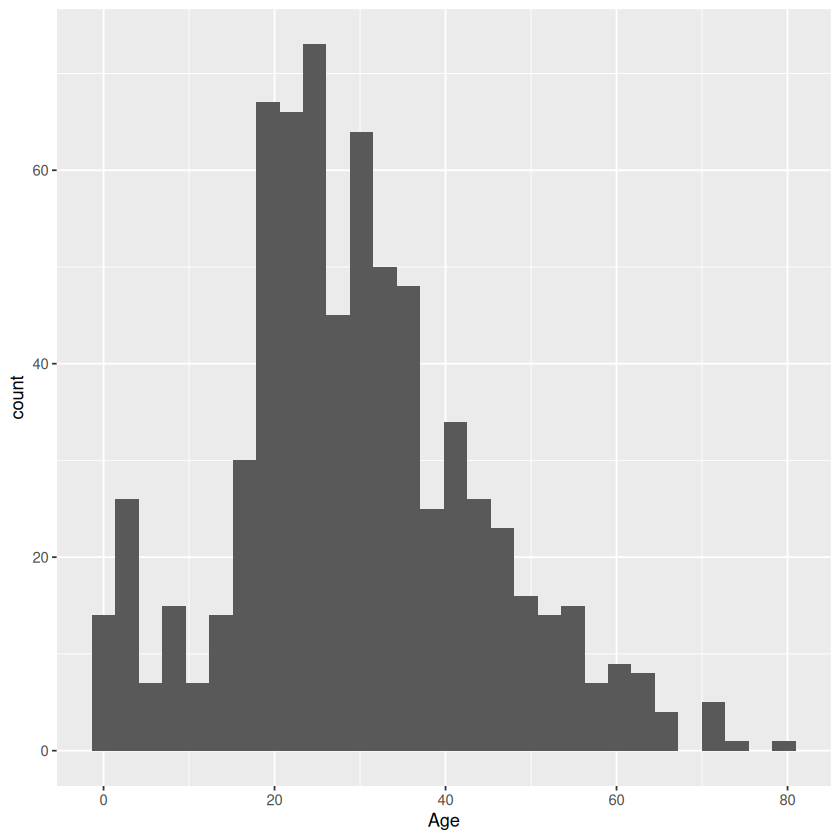

In [5]:
ggplot(titanic, aes(x = Age)) +
  geom_histogram(bins = 30)

Este gráfico nos permite responder preguntas simples pero muy importantes:

* ¿La mayoría de pasajeros eran jóvenes o adultos?
* ¿Hay edades extremas?
* ¿Faltan muchos valores?

---

### Detectar valores extremos

Otra cosa que solíamos hacer en Python era usar boxplots para detectar outliers.

En R, el boxplot se crea con `geom_boxplot()`.

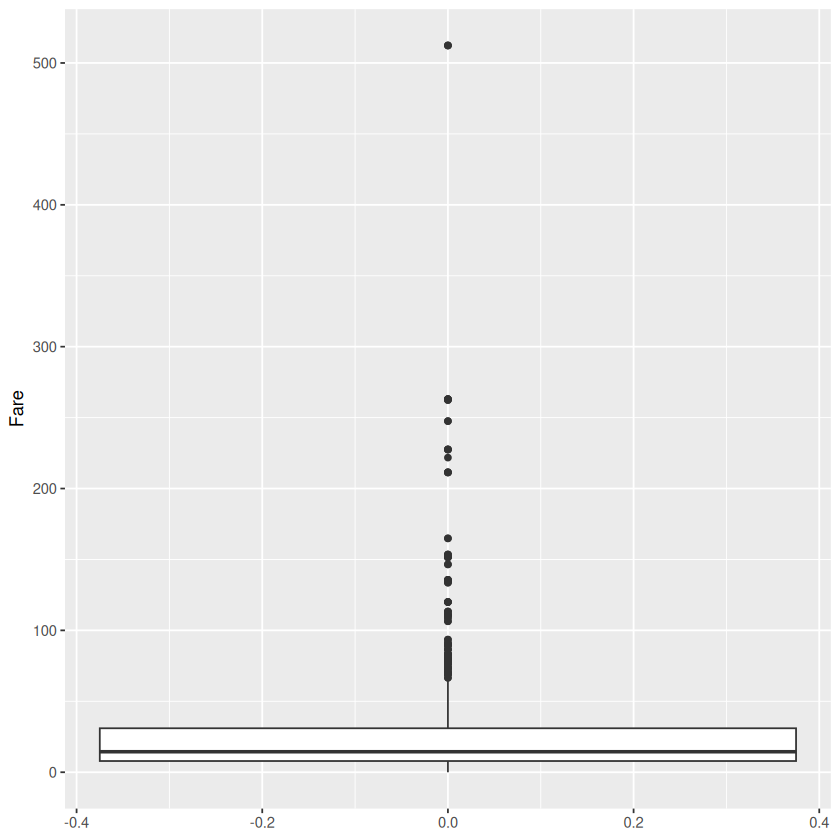

In [6]:
ggplot(titanic, aes(y = Fare)) +
  geom_boxplot()

Aquí aparecen claramente precios de billetes muy altos comparados con la mayoría.
Este tipo de valores extremos pueden afectar mucho a modelos matemáticos, así que es algo que tendremos que tener en cuenta más adelante.

---

### Relación entre dos variables

Una vez entendemos las variables por separado, el siguiente paso es ver si existe relación entre ellas.

Por ejemplo, podemos preguntarnos si existe alguna relación entre la edad y el precio del billete.

Warning message:
“Removed 177 rows containing missing values or values outside the scale range
(`geom_point()`).”


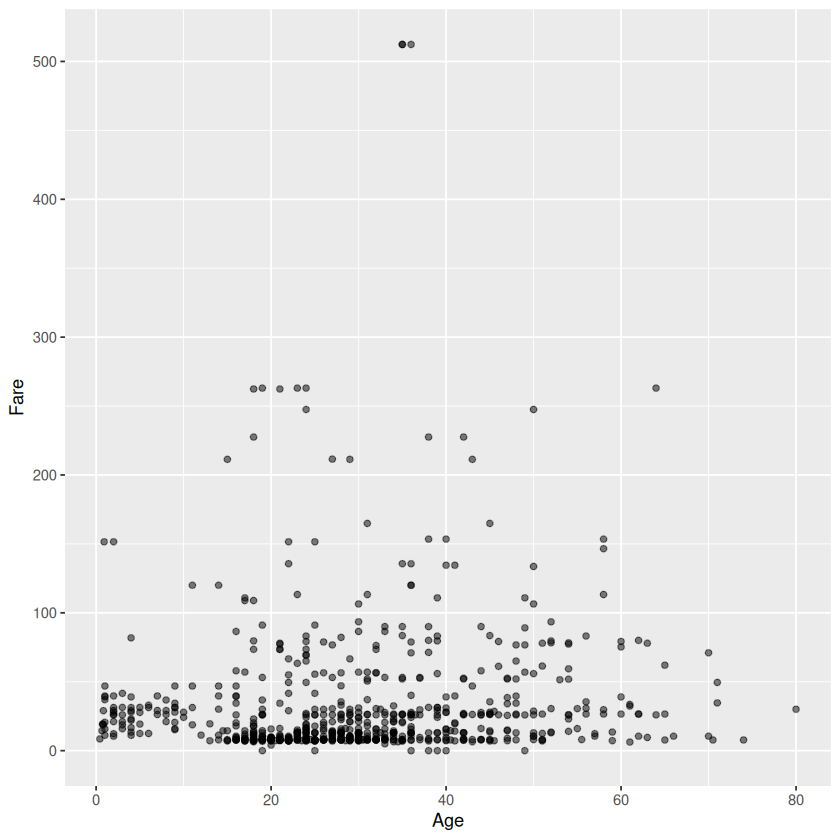

In [7]:
ggplot(titanic, aes(x = Age, y = Fare)) +
  geom_point(alpha = 0.5)

Este tipo de gráfico es equivalente al scatter plot que hacíamos en Python.
Nos ayuda a ver si hay algún patrón claro o si los datos están muy dispersos.

--

### Añadiendo información: quién sobrevivió

Ahora podemos añadir más información al gráfico usando el color.
En Python usábamos `hue`, en R lo indicamos dentro de `aes()`.

Warning message:
“Removed 177 rows containing missing values or values outside the scale range
(`geom_point()`).”


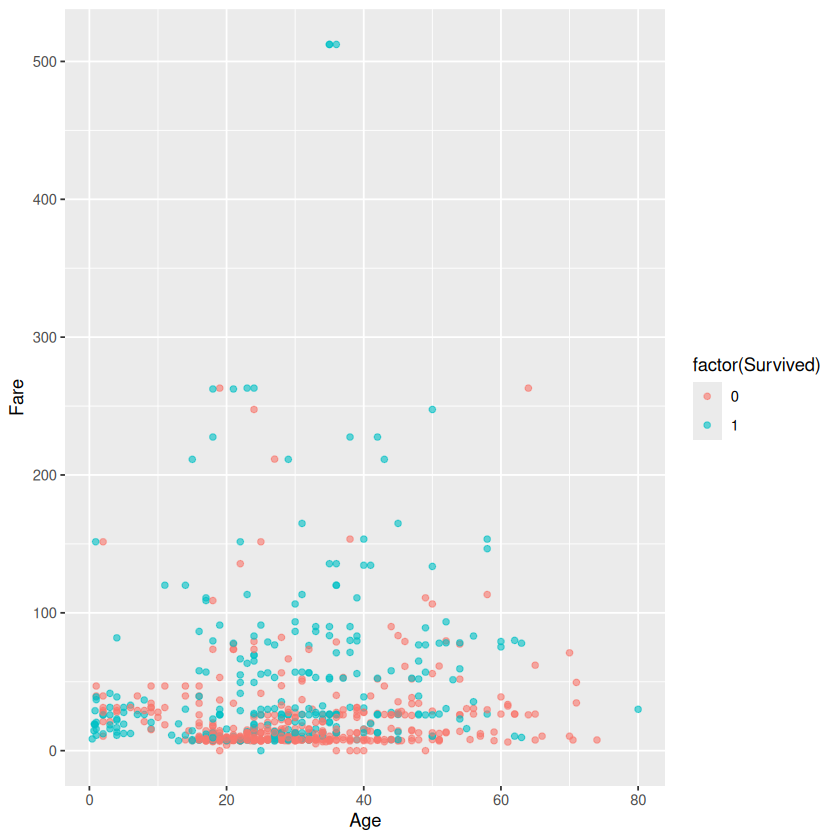

In [8]:
ggplot(titanic, aes(
  x = Age,
  y = Fare,
  color = factor(Survived)
)) +
  geom_point(alpha = 0.6)


Este gráfico ya empieza a darnos pistas interesantes:

* ciertos perfiles sobrevivieron más
* el precio del billete parece tener influencia
* la edad podría ser relevante

Esto ya es **pensamiento de IA**, aunque aún no hay modelos.

---

### Comparar grupos

En Python utilizábamos `groupby()` para comparar grupos.
En R usamos `group_by()` junto con `summarise()`.

Por ejemplo, podemos calcular la tasa de supervivencia por sexo.

In [9]:
titanic %>%
  group_by(Sex) %>%
  summarise(
    tasa_supervivencia = mean(Survived),
    n = n()
  )

Sex,tasa_supervivencia,n
<chr>,<dbl>,<int>
female,0.7420382,314
male,0.1889081,577


Este resultado es muy potente:
sin entrenar ningún modelo, ya estamos viendo qué variables pueden ser predictoras.

--

### Representar el resumen

A veces una tabla no es suficiente y un gráfico comunica mejor.


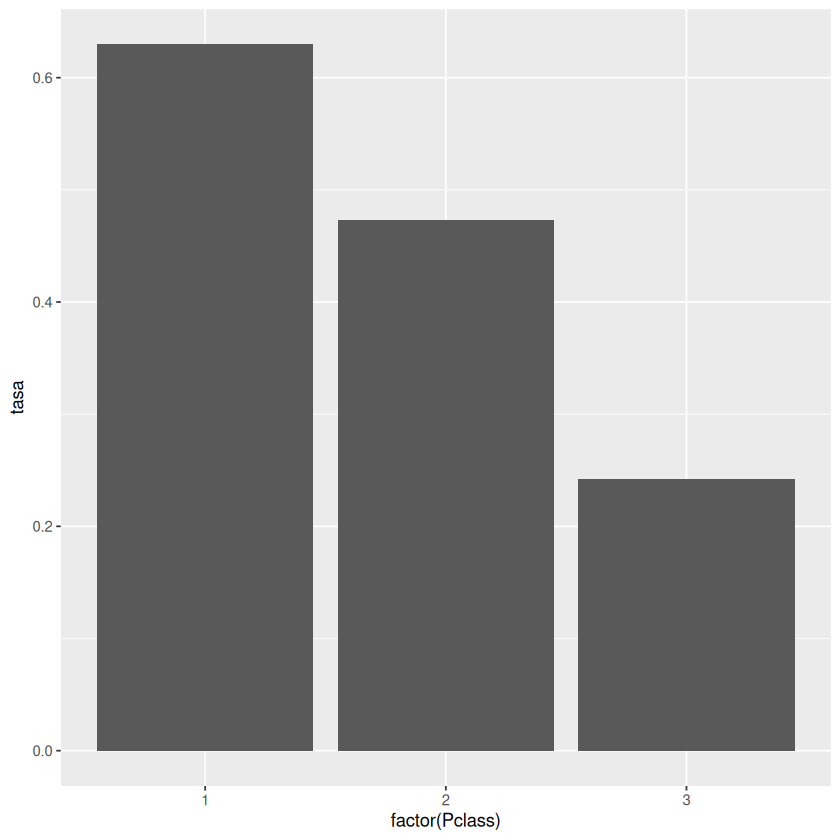

In [10]:
titanic %>%
  group_by(Pclass) %>%
  summarise(tasa = mean(Survived)) %>%
  ggplot(aes(x = factor(Pclass), y = tasa)) +
  geom_col()

Este gráfico deja muy claro que la clase del billete influyó en la supervivencia.


## Ahora te toca a ti: otro dataset distinto

Hasta ahora has seguido un ejemplo guiado.
Ahora vas a aplicar **exactamente el mismo proceso**, pero con otro dataset real: **Housing**.

```r
housing <- read_csv(
  "https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv"
)
```

Trabaja con él y responde, apoyándote en gráficos y tablas:

* ¿Qué variable crees que sería el objetivo de un modelo?
* ¿Hay valores que faltan?
* ¿Cómo se distribuye el precio de la vivienda?
* ¿Qué variables parecen relacionadas con el precio?

No se trata de “acertar”, sino de **razonar con los datos**.